# PHYS 223 Assignment 6
## Aaron Cohen - V01018161

In [2]:
# all imports and setup that we might need

import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt

import dwave_networkx as dnx

from dimod.reference.samplers import ExactSolver
sampler_CPU = ExactSolver()

from dwave.system import DWaveSampler, EmbeddingComposite
sampler_6 = EmbeddingComposite(DWaveSampler(id='Advantage_system6.4'))

### Question 1

In class we described a minor-embedding procedure to implement 3-qubit 3-SAT (logical qubits *a*, *b*, *c*) with 3 physical quibits ($q_0, q_1, q_4, q_5$). The procedure assumed $b = q_0 = q_5$ so that it required $q_0$ and $q_5$ to be "chained" in the same state. We concluded that the required QUBO was:

$
\begin{align}
E(q) = \frac{1}{3}(q_0 + q_5) - \frac{1}{3}(q_1 + q_4) + \frac{2}{3}(q_0q_4 + q_1q_4 + q_1q_5) - (q_0q_5)
\end{align}
$

Using your "classical" CPU, write down a python code that generates the energy table for all values of **q** and explain that this QUBO does ineed implement 3-SAT as the lowest energy state of the quantumn system.
*Hint:* Use the sampler `ExactSolver` from `dimod` to generate a list of all possibilities.

### Question 2

Implement a 10-qubit 3-SAT subject to the following eight clauses: $C_1(0,1,2), C_2(1,2,3), C_3(2,3,4), C_4(3,4,5), C_5(4,5,6), C_6(5,6,7), C_7(6,7,8), C_8(7,8,9).$ Note that $'0', '1', '2', \ldots$ represents binary variables, and each clause is satisfied (`True`) if only one of the three variables is $1$ and the other two are $0$.

*Hint:* The function `combinations(['0', '1', '2'], 1)` creates the BQM for $C_1(0,1,2).$ Can you write a loop to implement all of the other clauses together?

(a) Run the brute force function `ExactSolver` to find all possible answers.

(b) Run the algorithm in the QPU. How many correct answers do you get?

### Question 3

Generate a graph representing a triangular lattice using the code:

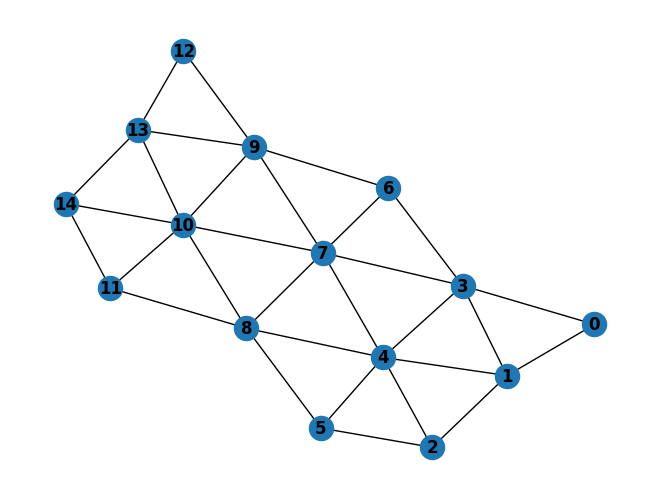

In [3]:
G=nx.triangular_lattice_graph(4, 4)
G=nx.convert_node_labels_to_integers(G)
nx.draw(G, with_labels=True, font_weight='bold')

(a) Use the QPU to find the minimum vertex cover for the graph above.

(b) Use `ExactSolver` to get the optimum answer (only 9 vertices!). Did the QPU get it? If not, run again until it gets the optimum answer.

### Question 4

Use the QPU to prove that the triangular lattice in Problem 3 above can be colored with three colors.

*Hint*: The solution follows closely the map coloring example in the Ocean documentation. To get the list of nodes and neighbors of the graph use `nods = nx.nodes(G)` and `neighs = nx.edges(G)`, respectively. `nods` will play the role of `provinces` and `neighs` of `neighbors`. But these are now integers (rather than strings) so you will have to convert some of the variables into strings, e.g. replace `u` for `str(u)`, etc when appropriate.